# Assignment 5 Questions

## Problem Statement

#### Task 1:

Read the dataset from the bellow link

url = https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv


In [37]:
import pandas as pd
url="https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv"
df=pd.read_csv(url)
df.head()

,year,name,percent,sex
0,1880,John,0.081541,boy
1,1880,William,0.080511,boy
2,1880,James,0.050057,boy
3,1880,Charles,0.045167,boy
4,1880,George,0.043292,boy


## -----------------------------------------------------------------------------------------------------------------------------

Questions

1. Delete unnamed columns

### NO UNNAMED COLUMNS

## -----------------------------------------------------------------------------------------------------------------------------

2. Show the distribution of male and female

In [23]:
df['sex'].value_counts()

girl    129000
boy     129000
Name: sex, dtype: int64

## -----------------------------------------------------------------------------------------------------------------------------

3. Show the top 5 most preferred names

In [17]:
df['name'].value_counts().head()

Jessie       258
Leslie       247
Jean         244
Guadalupe    244
Lee          240
Name: name, dtype: int64

## -----------------------------------------------------------------------------------------------------------------------------

4. What is the median name occurence in the dataset

In [45]:
df.groupby('name').count()['year'].idxmax()

'Jessie'

## -----------------------------------------------------------------------------------------------------------------------------

5. Distribution of male and female born count by states

### No state is given

## -----------------------------------------------------------------------------------------------------------------------------

#### Task 2:

We have the min and max temperatures in a city In India for each months of the year. We
would like to find a function to describe this and show it graphically, the dataset given below.

    Task:
    1. fitting it to the periodic function
    2. plot the fit
    
    Data
    Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
    Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18


Text(0, 0.5, 'Min and max temperature')

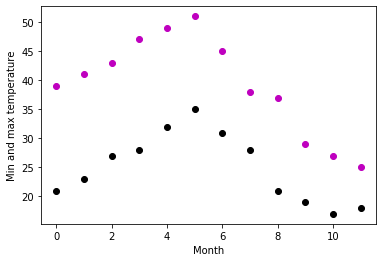

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ma=[39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]
mi=[21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]

tmp_max=np.array(ma)
tmp_min=np.array(mi)

months = np.arange(12)
plt.plot(months, tmp_max,'mo')
plt.plot(months, tmp_min,'ko')
plt.xlabel('Month')
plt.ylabel('Min and max temperature')

In [4]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      tmp_max, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      tmp_min, [-40, 20, 0])

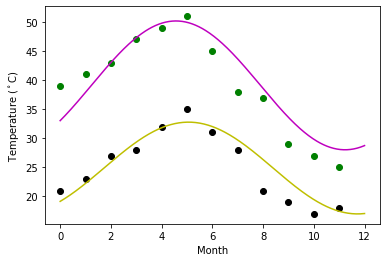

In [6]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, tmp_max, 'go')
plt.plot(days, yearly_temps(days, *res_max), 'm-')
plt.plot(months, tmp_min, 'ko')
plt.plot(days, yearly_temps(days, *res_min), 'y-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

## -----------------------------------------------------------------------------------------------------------------------------